In [31]:
import os
import pandas as pd

def read_file(filename):
    with open(filename,'r',encoding='iso-8859-15') as out:
        lines = out.readlines()
        return lines
data = []

path = r'''/home/naveenselvan/Ransomware_Classification/Dataset'''
for folder in sorted(os.listdir(path)):
    for file in sorted(os.listdir(path+'/'+folder)):
                pathname = path+'/'+folder+'/'+file
                file_read = read_file(pathname)
                data.append((folder, file_read))

In [32]:
dataframe = pd.DataFrame(data)
dataframe = dataframe.rename(columns = {0:'output'})
dataframe = dataframe.rename(columns = {1:'text'})
dataframe

,output,text
0,Clean,"[!This program cannot be run in DOS mode.\n, R..."
1,Clean,"[!This program cannot be run in DOS mode.\n, ]..."
2,Clean,"[!This program cannot be run in DOS mode.\n, %..."
3,Clean,"[!This program cannot be run in DOS mode.\n, P..."
4,Clean,"[!This program cannot be run in DOS mode.\n, R..."
...,...,...
1631,Ransomware,"[!This program cannot be run in DOS mode.\n, R..."
1632,Ransomware,"[!This program cannot be run in DOS mode.\n, R..."
1633,Ransomware,"[!This program cannot be run in DOS mode.\n, ...."
1634,Ransomware,"[!This program cannot be run in DOS mode.\n, s..."


In [38]:
import re
def clean_text(text):
    
    line = re.sub("[^a-zA-Z0-9.]"," ",str(text))
    stop_words=['this','program','cannot', 'run', 'dos', 'mode', 'rich', '.text','.didat', '.rdata', '.data', '.rsrc','.pdata','mode.','.reloc',
               '.bss','microsoft','error']
   
    word_list = ''.join([item.strip('\n') for item in line])
   
    word_list = word_list.lower().split()  

    word_list = [w for w in word_list if not w in stop_words]
   
    word_list = [w for w in word_list if len(w)>3]
    word_list = " ".join(word_list)
    
    return word_list

In [39]:
dataframe['clean'] = dataframe['text'].apply(clean_text)

In [61]:
words = ' '.join(list(dataframe[dataframe['output'] == 'Ransomware']['clean']))
from collections import Counter
Counter(words.split()).most_common(10000)

[('iiij', 1148),
 ('kernel32.dll', 922),
 ('sssss', 910),
 ('vvvvv', 861),
 ('version', 855),
 ('type', 851),
 ('info', 707),
 ('user32.dll', 684),
 ('abcdefghijklmnopqrstuvwxyz', 675),
 ('advapi32.dll', 627),
 ('wwwww', 615),
 ('exit', 606),
 ('stringfileinfo', 581),
 ('fileversion', 571),
 ('legalcopyright', 568),
 ('companyname', 564),
 ('productname', 564),
 ('msvcrt.dll', 553),
 ('4d4h4l4p4t4x4', 549),
 ('5d5h5l5p5t5x5', 538),
 ('7d7h7l7p7t7x7', 529),
 ('8d8h8l8p8t8x8', 521),
 ('9d9h9l9p9t9x9', 521),
 ('6d6h6l6p6t6x6', 520),
 ('space', 519),
 ('enough', 504),
 ('help', 443),
 ('2d2h2l2p2t2x2', 437),
 ('0d0h0l0p0t0x0', 436),
 ('1d1h1l1p1t1x1', 436),
 ('3d3h3l3p3t3x3', 435),
 ('getmodulehandlea', 432),
 ('filedescription', 432),
 ('ppppp', 428),
 ('application', 426),
 ('fdiv', 420),
 ('your', 414),
 ('initterm', 409),
 ('setusermatherr', 405),
 ('commode', 405),
 ('from', 405),
 ('originalfilename', 404),
 ('controlfp', 402),
 ('constructor', 397),
 ('bree.olgs.khaloetristan.abundo

In [37]:
dataframe

,output,text,clean
0,Clean,"[!This program cannot be run in DOS mode.\n, R...","['!this mode.\n', 'rich\n', '.text\n', '`.rdat..."
1,Clean,"[!This program cannot be run in DOS mode.\n, ]...","['!this mode.\n', ']rich\n', '.text\n', '`.dat..."
2,Clean,"[!This program cannot be run in DOS mode.\n, %...","['!this mode.\n', '%6rich\n', '.text\n', '`.rd..."
3,Clean,"[!This program cannot be run in DOS mode.\n, P...","['!this mode.\n', 'prich\n', '.text\n', '`.rda..."
4,Clean,"[!This program cannot be run in DOS mode.\n, R...","['!this mode.\n', 'rich\n', '.text\n', '`.rdat..."
...,...,...,...
1631,Ransomware,"[!This program cannot be run in DOS mode.\n, R...","['!this mode.\n', 'richn9\n', '.text\n', '`.rd..."
1632,Ransomware,"[!This program cannot be run in DOS mode.\n, R...","['!this mode.\n', 'rich\n', '.data\n', '.rsrc\..."
1633,Ransomware,"[!This program cannot be run in DOS mode.\n, ....","['!this mode.\n', '.text\n', '`.rsrc\n', '@.re..."
1634,Ransomware,"[!This program cannot be run in DOS mode.\n, s...","['!this mode.\n', 'srichor\n', '.text\n', '`.r..."


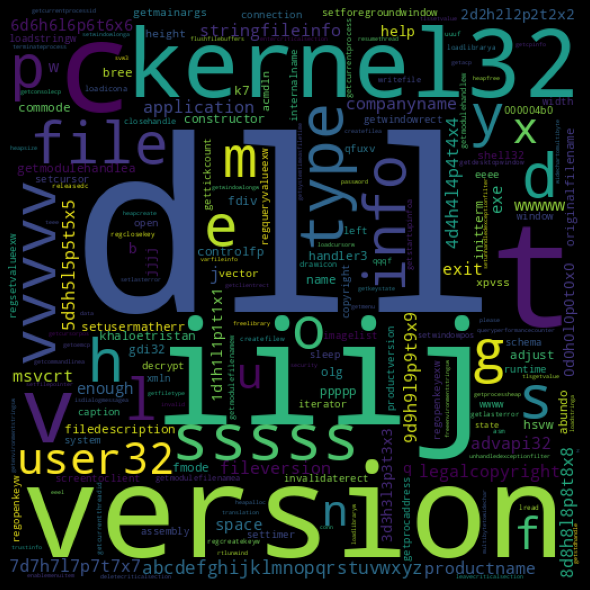

In [29]:
words = ' '.join(list(dataframe[dataframe['output'] == 'Ransomware']['clean']))
words=words.lower()
wc = WordCloud(width = 512,height = 512,collocations=False).generate(words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [5]:
#dataframe=dataframe.sample(frac=1)

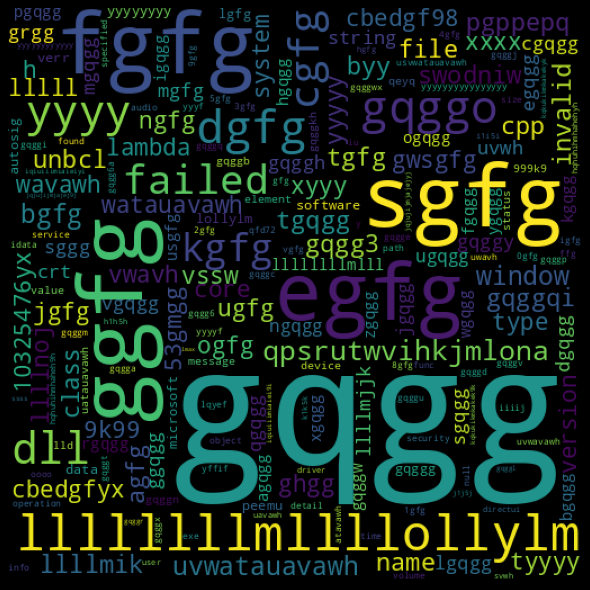

In [12]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log, sqrt
import pandas as pd

import numpy as np
import re
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

words = ' '.join(list(dataframe[dataframe['output'] == 'Clean']['clean']))
words=words.lower()
wc = WordCloud(width = 512,height = 512,collocations=False).generate(words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

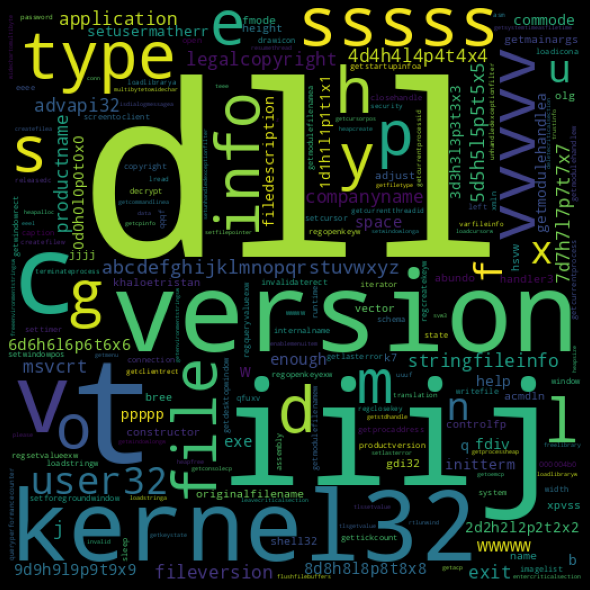

In [13]:
words = ' '.join(list(dataframe[dataframe['output'] == 'Ransomware']['clean']))
words=words.lower()
wc = WordCloud(width = 512,height = 512,collocations=False).generate(words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])


ModuleNotFoundError: No module named 'sklearn'

In [7]:
sgd

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...dom_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))])

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dataframe['clean'], dataframe['output'], test_size=0.2, random_state=101)


X = dataframe.clean
y = dataframe.output
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)


In [38]:
sgd.fit(x_train, y_train)



/home/naveenezio/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...dom_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))])

In [39]:
#%%time
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

y_pred = sgd.predict(x_test)



print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.9878048780487805
              precision    recall  f1-score   support

       Clean       1.00      0.99      0.99       206
  Ransomware       0.98      0.99      0.98       122

   micro avg       0.99      0.99      0.99       328
   macro avg       0.99      0.99      0.99       328
weighted avg       0.99      0.99      0.99       328



In [15]:
import os
import sys
import pandas as pd

def read_file(filename):
    with open(filename,'r',encoding='iso-8859-15') as out:
        lines = out.readlines()
        return lines
newdata = []


path = r'''/home/naveenezio/Ransomware_Classification/Sample'''
for folder in sorted(os.listdir(path)):
    for file in sorted(os.listdir(path+'/'+folder)):
                pathname = path+'/'+folder+'/'+file
                file_read = read_file(pathname)
                newdata.append((file, file_read))
                
                


In [16]:
newdataframe = pd.DataFrame(newdata)
newdataframe = newdataframe.rename(columns = {0:'filename'})
newdataframe = newdataframe.rename(columns = {1:'text'})
newdataframe

,filename,text
0,412f1b66437e5159fbd54cb7bb0c526e-hidden-tear.e...,"[!This program cannot be run in DOS mode.\n, ...."
1,5a5e32203cf8eee1b7e9125b1c97ed94-GlobeImposter...,"[!This program cannot be run in DOS mode.\n, o..."
2,697158bcade7373ccc9e52ea1171d780988fc845d2b696...,"[!This program cannot be run in DOS mode.\n, r..."
3,8b6bc16fd137c09a08b02bbe1bb7d670-cerber.exe.txt,"[!This program cannot be run in DOS mode.\n, R..."
4,LaunchWinApp.exe.txt,"[!This program cannot be run in DOS mode.\n, R..."
5,LocationNotificationWindows.exe.txt,"[!This program cannot be run in DOS mode.\n, R..."
6,Ransomware.Unnamed_0_1869459025fcf845b90912236...,"[!This program cannot be run in DOS mode.\n, ...."
7,WinBioDataModelOOBE.exe.txt,"[!This program cannot be run in DOS mode.\n, R..."
8,WinMgmt.exe.txt,"[!This program cannot be run in DOS mode.\n, R..."
9,WinSAT.exe.txt,"[!This program cannot be run in DOS mode.\n, R..."


In [17]:
newdataframe['clean'] = newdataframe['text'].apply(clean_text)

In [18]:
def detect_msg(s):
    return sgd.predict([s])[0]
      


In [19]:
newdataframe['svm_model'] = newdataframe['clean'].apply(detect_msg)

In [20]:
newdataframe

,filename,text,clean,svm_model
0,412f1b66437e5159fbd54cb7bb0c526e-hidden-tear.e...,"[!This program cannot be run in DOS mode.\n, ....",pasg lsystem.resources.resourcereader mscorlib...,Ransomware
1,5a5e32203cf8eee1b7e9125b1c97ed94-GlobeImposter...,"[!This program cannot be run in DOS mode.\n, o...",richmo 6d3p taskkill 0123456789abcdef sha224 s...,Clean
2,697158bcade7373ccc9e52ea1171d780988fc845d2b696...,"[!This program cannot be run in DOS mode.\n, r...",rrichor suvh rsuv svw3 pqssh sruhh wsru trsvw ...,Ransomware
3,8b6bc16fd137c09a08b02bbe1bb7d670-cerber.exe.txt,"[!This program cannot be run in DOS mode.\n, R...",nqbqp cetsvocb drfws vyqpuaoel gwtrgan hstugal...,Ransomware
4,LaunchWinApp.exe.txt,"[!This program cannot be run in DOS mode.\n, R...",rich. suvwh svwh uvwavawh vwavh svwh watauavaw...,Clean
5,LocationNotificationWindows.exe.txt,"[!This program cannot be run in DOS mode.\n, R...",uwatavawh uvwatauavawh suvwavh uvwatauavawh ug...,Clean
6,Ransomware.Unnamed_0_1869459025fcf845b90912236...,"[!This program cannot be run in DOS mode.\n, ....",bsjb v4.0.30319 strings guid blob mscorlib obj...,Ransomware
7,WinBioDataModelOOBE.exe.txt,"[!This program cannot be run in DOS mode.\n, R...",suvwh svwh uvwavawh vwavh watauavawh f98u uue3...,Clean
8,WinMgmt.exe.txt,"[!This program cannot be run in DOS mode.\n, R...",wavawh wavawh suvwatauavawh uatawh fa94lu fa94...,Clean
9,WinSAT.exe.txt,"[!This program cannot be run in DOS mode.\n, R...",pagelk wavawh uvwatauavawh uvwavawh vwatavawh ...,Clean


In [31]:
dataframe['output'].value_counts()

Clean         945
Ransomware    691
Name: output, dtype: int64

In [41]:

from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

msg_filter = Pipeline([
    ('vectorizer', TfidfVectorizer(analyzer=clean_text)), # messages to weighted TFIDF score
    ('classifier', MultinomialNB())                    # train on TFIDF vectors with Naive Bayes
])

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dataframe['text'], dataframe['output'], test_size=0.2, random_state=101)

In [43]:
msg_filter.fit(x_train, y_train)


Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer=<function clean_text at 0x7fd0b8f1cea0>,
        binary=False, decode_error='strict', dtype=<class 'numpy.float64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), norm='l2...      vocabulary=None)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [44]:
#%%time
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

y_pred = msg_filter.predict(x_test)



print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.823170731707317
              precision    recall  f1-score   support

       Clean       0.77      0.99      0.87       190
  Ransomware       0.99      0.59      0.74       138

   micro avg       0.82      0.82      0.82       328
   macro avg       0.88      0.79      0.80       328
weighted avg       0.86      0.82      0.81       328



In [45]:
def detect_msg(s):
    return msg_filter.predict([s])[0]
      


In [46]:
newdataframe['naivebayes_model'] = newdataframe['clean'].apply(detect_msg)

In [47]:
newdataframe

,filename,text,clean,svm_model,naivebayes_model
0,412f1b66437e5159fbd54cb7bb0c526e-hidden-tear.e...,"[!This program cannot be run in DOS mode.\n, ....",pasg lsystem.resources.resourcereader mscorlib...,Ransomware,Clean
1,5a5e32203cf8eee1b7e9125b1c97ed94-GlobeImposter...,"[!This program cannot be run in DOS mode.\n, o...",richmo 6d3p taskkill 0123456789abcdef sha224 s...,Clean,Clean
2,697158bcade7373ccc9e52ea1171d780988fc845d2b696...,"[!This program cannot be run in DOS mode.\n, r...",rrichor suvh rsuv svw3 pqssh sruhh wsru trsvw ...,Ransomware,Ransomware
3,8b6bc16fd137c09a08b02bbe1bb7d670-cerber.exe.txt,"[!This program cannot be run in DOS mode.\n, R...",nqbqp cetsvocb drfws vyqpuaoel gwtrgan hstugal...,Ransomware,Clean
4,LaunchWinApp.exe.txt,"[!This program cannot be run in DOS mode.\n, R...",rich. suvwh svwh uvwavawh vwavh svwh watauavaw...,Clean,Clean
5,LocationNotificationWindows.exe.txt,"[!This program cannot be run in DOS mode.\n, R...",uwatavawh uvwatauavawh suvwavh uvwatauavawh ug...,Clean,Clean
6,Ransomware.Unnamed_0_1869459025fcf845b90912236...,"[!This program cannot be run in DOS mode.\n, ....",bsjb v4.0.30319 strings guid blob mscorlib obj...,Ransomware,Ransomware
7,WinBioDataModelOOBE.exe.txt,"[!This program cannot be run in DOS mode.\n, R...",suvwh svwh uvwavawh vwavh watauavawh f98u uue3...,Clean,Clean
8,WinMgmt.exe.txt,"[!This program cannot be run in DOS mode.\n, R...",wavawh wavawh suvwatauavawh uatawh fa94lu fa94...,Clean,Clean
9,WinSAT.exe.txt,"[!This program cannot be run in DOS mode.\n, R...",pagelk wavawh uvwatauavawh uvwavawh vwatavawh ...,Clean,Clean


In [48]:
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils


Using TensorFlow backend.


In [49]:
dataframe=dataframe.sample(frac=1,replace=True, random_state=1)

In [50]:
train_size = int(len(dataframe) * .9)
print ("Train size: %d" % train_size)
print ("Test size: %d" % (len(dataframe) - train_size))

Train size: 1472
Test size: 164


In [51]:
#dataframe['clean'] = dataframe['text'].apply(clean_text)
train_posts = dataframe['clean'][:train_size]
train_tags = dataframe['output'][:train_size]

test_posts = dataframe['clean'][train_size:]
test_tags = dataframe['output'][train_size:]

In [52]:
max_words = 250
tokenize = text.Tokenizer(num_words=max_words, char_level=False)

In [53]:
tokenize.fit_on_texts(train_posts) # only fit on train
x_train = tokenize.texts_to_matrix(train_posts)
x_test = tokenize.texts_to_matrix(test_posts)

In [54]:
encoder = LabelEncoder()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)

In [55]:
num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

In [56]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (1472, 250)
x_test shape: (164, 250)
y_train shape: (1472, 2)
y_test shape: (164, 2)


In [57]:
batch_size = 32
epochs = 2

In [58]:
# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [59]:
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Instructions for updating:
Use tf.cast instead.
Train on 1324 samples, validate on 148 samples
Epoch 1/2
1324/1324 [==============================] - 1s 1ms/step - loss: 0.2899 - acc: 0.8716 - val_loss: 0.1199 - val_acc: 0.9730
Epoch 2/2
1324/1324 [==============================] - 0s 103us/step - loss: 0.0994 - acc: 0.9668 - val_loss: 0.0666 - val_acc: 0.9865


In [60]:
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test accuracy:', score[1])



164/164 [==============================] - 0s 100us/step
Test accuracy: 0.9695121951219512


In [61]:
y_softmax = model.predict(x_test)

y_test_1d = []
y_pred_1d = []

for i in range(len(y_test)):
    probs = y_test[i]
    index_arr = np.nonzero(probs)
    one_hot_index = index_arr[0].item(0)
    y_test_1d.append(one_hot_index)

for i in range(0, len(y_softmax)):
    probs = y_softmax[i]
    predicted_index = np.argmax(probs)
    y_pred_1d.append(predicted_index)

In [62]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

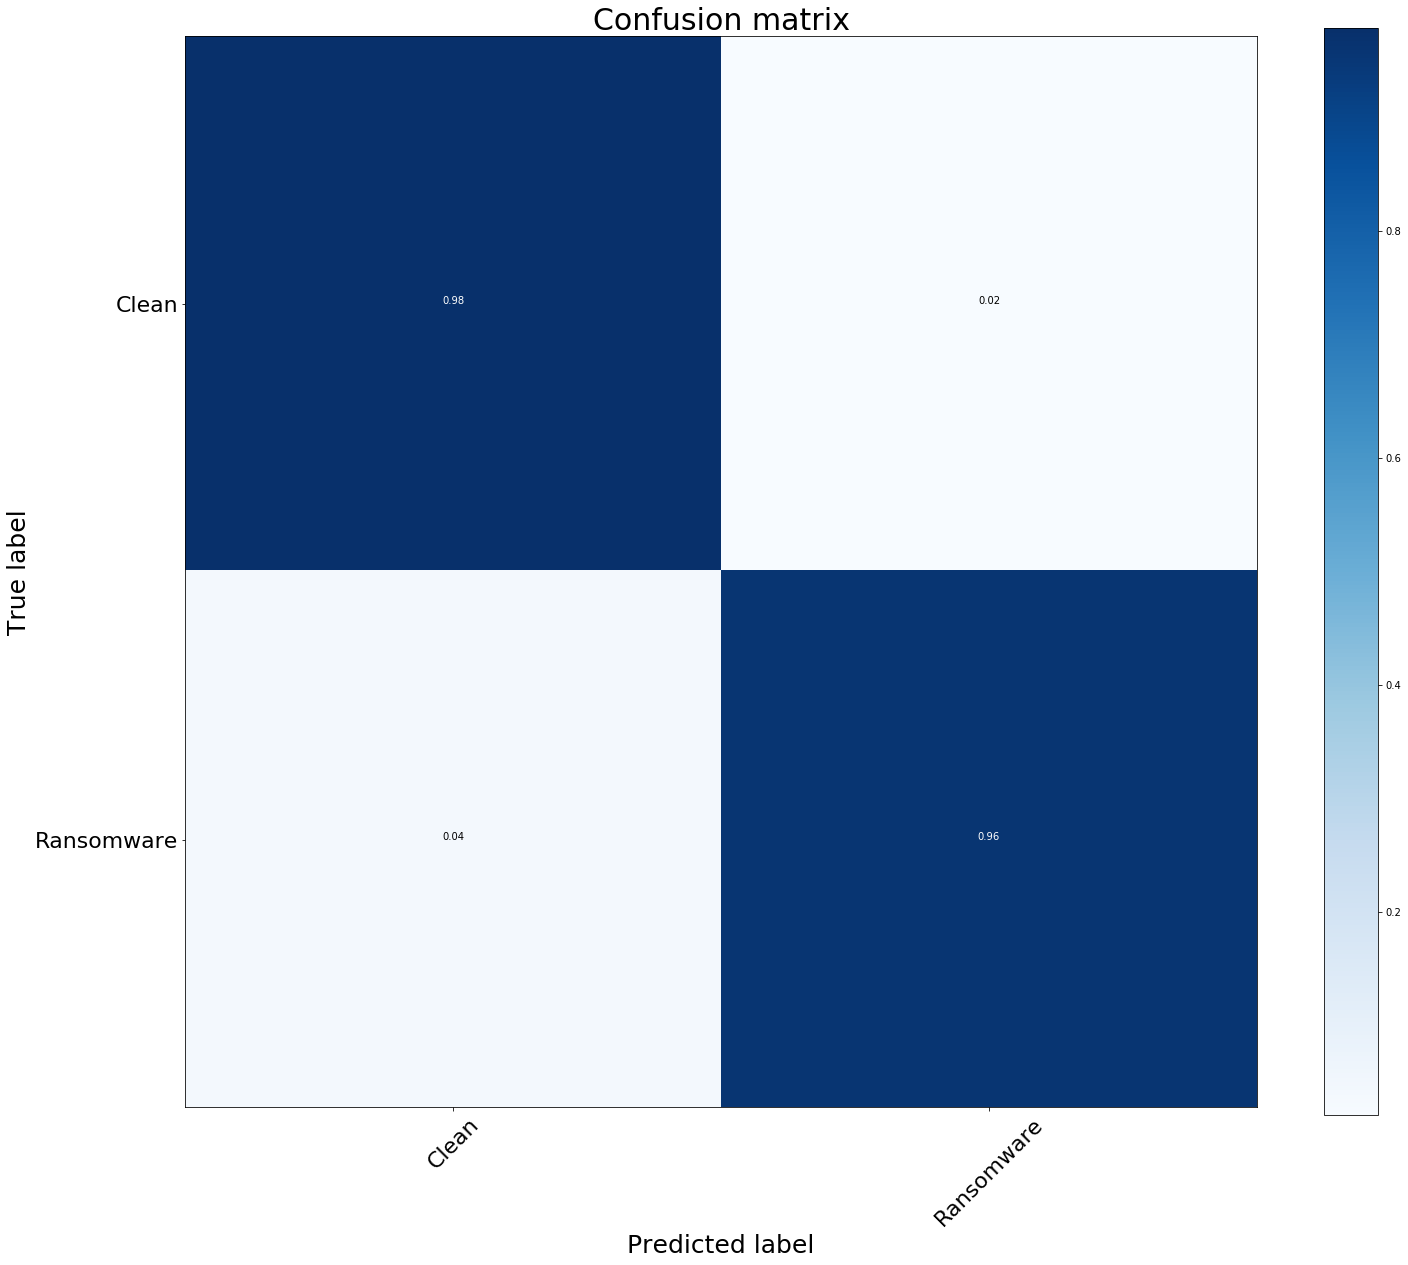

In [63]:
text_labels = encoder.classes_
cnf_matrix = confusion_matrix(y_test_1d, y_pred_1d)
plt.figure(figsize=(24,20))
plot_confusion_matrix(cnf_matrix, classes=text_labels, title="Confusion matrix")
plt.show()

In [102]:
import pickle
filename='keras_classification.sav'

pickle.dump(model,open(filename,'wb'))




In [64]:
def ml(s):
    df = pd.DataFrame({"newdata": [s]})
    #df['clean'] = df['newdata'].apply(clean_text)
    train_p = df['newdata']
    e_test=tokenize.texts_to_matrix(train_p)
    #print(e_test)
    x=model.predict(np.array([e_test[0]]))
    #print("x",x)
    predicted_label = text_labels[np.argmax(x)]
    #print("predicted_label",predicted_label)
    return predicted_label

In [65]:
newdataframe['keras_model'] = newdataframe['clean'].apply(ml)

In [66]:
newdataframe

,filename,text,clean,svm_model,naivebayes_model,keras_model
0,412f1b66437e5159fbd54cb7bb0c526e-hidden-tear.e...,"[!This program cannot be run in DOS mode.\n, ....",pasg lsystem.resources.resourcereader mscorlib...,Ransomware,Clean,Clean
1,5a5e32203cf8eee1b7e9125b1c97ed94-GlobeImposter...,"[!This program cannot be run in DOS mode.\n, o...",richmo 6d3p taskkill 0123456789abcdef sha224 s...,Clean,Clean,Clean
2,697158bcade7373ccc9e52ea1171d780988fc845d2b696...,"[!This program cannot be run in DOS mode.\n, r...",rrichor suvh rsuv svw3 pqssh sruhh wsru trsvw ...,Ransomware,Ransomware,Clean
3,8b6bc16fd137c09a08b02bbe1bb7d670-cerber.exe.txt,"[!This program cannot be run in DOS mode.\n, R...",nqbqp cetsvocb drfws vyqpuaoel gwtrgan hstugal...,Ransomware,Clean,Ransomware
4,LaunchWinApp.exe.txt,"[!This program cannot be run in DOS mode.\n, R...",rich. suvwh svwh uvwavawh vwavh svwh watauavaw...,Clean,Clean,Clean
5,LocationNotificationWindows.exe.txt,"[!This program cannot be run in DOS mode.\n, R...",uwatavawh uvwatauavawh suvwavh uvwatauavawh ug...,Clean,Clean,Clean
6,Ransomware.Unnamed_0_1869459025fcf845b90912236...,"[!This program cannot be run in DOS mode.\n, ....",bsjb v4.0.30319 strings guid blob mscorlib obj...,Ransomware,Ransomware,Ransomware
7,WinBioDataModelOOBE.exe.txt,"[!This program cannot be run in DOS mode.\n, R...",suvwh svwh uvwavawh vwavh watauavawh f98u uue3...,Clean,Clean,Clean
8,WinMgmt.exe.txt,"[!This program cannot be run in DOS mode.\n, R...",wavawh wavawh suvwatauavawh uatawh fa94lu fa94...,Clean,Clean,Clean
9,WinSAT.exe.txt,"[!This program cannot be run in DOS mode.\n, R...",pagelk wavawh uvwatauavawh uvwavawh vwatavawh ...,Clean,Clean,Clean


In [71]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

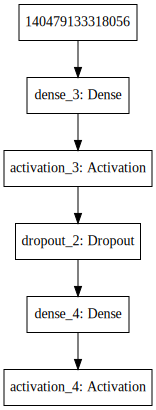

In [72]:

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))


Train on 1104 samples, validate on 368 samples
Epoch 1/50
1104/1104 [==============================] - 0s 172us/step - loss: 0.0614 - acc: 0.9819 - val_loss: 0.0643 - val_acc: 0.9837
Epoch 2/50
1104/1104 [==============================] - 0s 148us/step - loss: 0.0381 - acc: 0.9900 - val_loss: 0.0507 - val_acc: 0.9864
Epoch 3/50
1104/1104 [==============================] - 0s 144us/step - loss: 0.0320 - acc: 0.9909 - val_loss: 0.0511 - val_acc: 0.9864
Epoch 4/50
1104/1104 [==============================] - 0s 143us/step - loss: 0.0239 - acc: 0.9928 - val_loss: 0.0434 - val_acc: 0.9864
Epoch 5/50
1104/1104 [==============================] - 0s 150us/step - loss: 0.0211 - acc: 0.9955 - val_loss: 0.0467 - val_acc: 0.9837
Epoch 6/50
1104/1104 [==============================] - 0s 152us/step - loss: 0.0207 - acc: 0.9946 - val_loss: 0.0397 - val_acc: 0.9864
Epoch 7/50
1104/1104 [==============================] - 0s 161us/step - loss: 0.0194 - acc: 0.9973 - val_loss: 0.0392 - val_acc: 0.9864
E

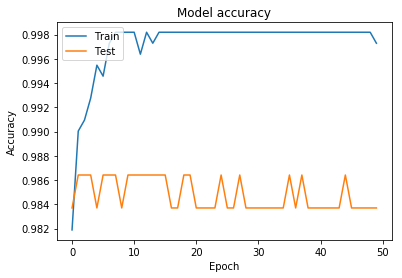

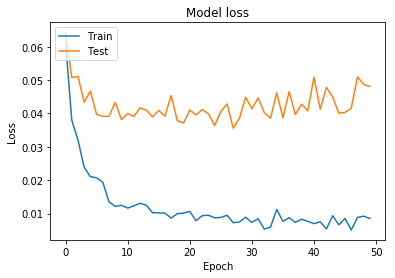

In [73]:
import matplotlib.pyplot as plt

history = model.fit(x_train, y_train, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [74]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               128512    
_________________________________________________________________
activation_3 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 1026      
_________________________________________________________________
activation_4 (Activation)    (None, 2)                 0         
Total params: 129,538
Trainable params: 129,538
Non-trainable params: 0
_________________________________________________________________
None
